<a href="https://colab.research.google.com/github/rohitsajiv/Predictive_Analytics---Project_1/blob/main/multiple_linear_regression_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [46]:
df = pd.read_csv("cars.csv")
#print(df.head(10))

print(df.isnull().sum)
target = 'Fuel Information.City mpg'
Features = ['Engine Information.Engine Statistics.Horsepower',
        'Engine Information.Engine Statistics.Torque',
        'Dimensions.Width']
for col in ['Engine Information.Engine Statistics.Horsepower',
            'Engine Information.Engine Statistics.Torque',
            'Dimensions.Width']:
    print(f"Unique values in {col}:")
    print(df[col].unique()[:10])
df[Features] = df[Features].apply(pd.to_numeric, errors = 'coerce')
df = df.dropna(subset=Features + [target])

<bound method DataFrame.sum of       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                 False              False             False   
1                 False              False             False   
2                 False              False             False   
3                 False              False             False   
4                 False              False             False   
...                 ...                ...               ...   
5071              False              False             False   
5072              False              False             False   
5073              False              False             False   
5074              False              False             False   
5075              False              False             False   

      Engine Information.Driveline  Engine Information.Engine Type  \
0                            False                           False   
1                            False                          

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_test.isnull().sum)
X_test = X_test.dropna()
print(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficents: ", model.coef_)
print("Intercept: ", model.intercept_)

X_test shape:  (1523, 3)
y_test shape:  (1523,)
<bound method DataFrame.sum of       Engine Information.Engine Statistics.Horsepower  \
842                                             False   
4832                                            False   
33                                              False   
4761                                            False   
1491                                            False   
...                                               ...   
990                                             False   
2977                                            False   
4262                                            False   
3130                                            False   
353                                             False   

      Engine Information.Engine Statistics.Torque  Dimensions.Width  
842                                         False             False  
4832                                        False             False  
33                        

In [50]:
y_pred = model.predict(X_test)
#print(y_pred)

In [52]:
print("y_pred shape: ", y_pred.shape)
print("y_test shape: ", y_test.shape)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

y_pred shape:  (1523,)
y_test shape:  (1523,)
Mean Squared Error:  8.486935515242445
R-squared:  0.5788294766639352


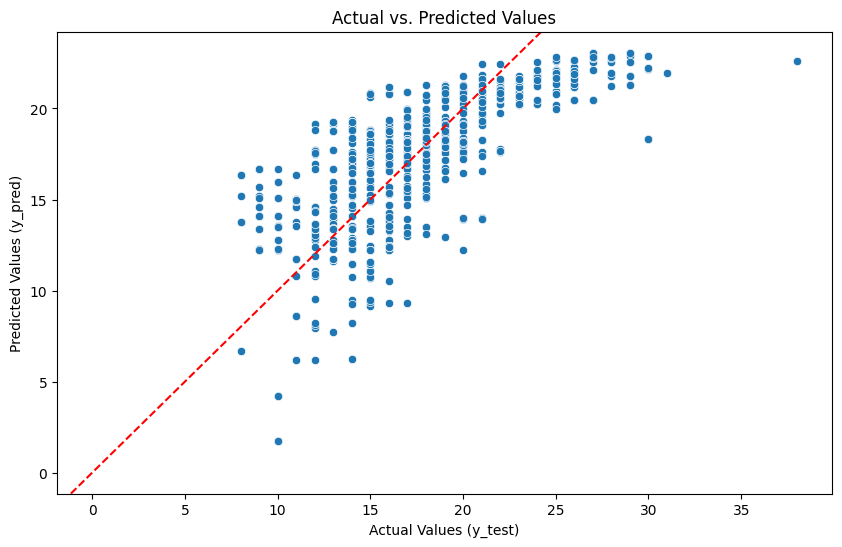

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.axline([0, 0], slope=1, color='red', linestyle="--")
plt.show()